## Machine Learning Pipeline

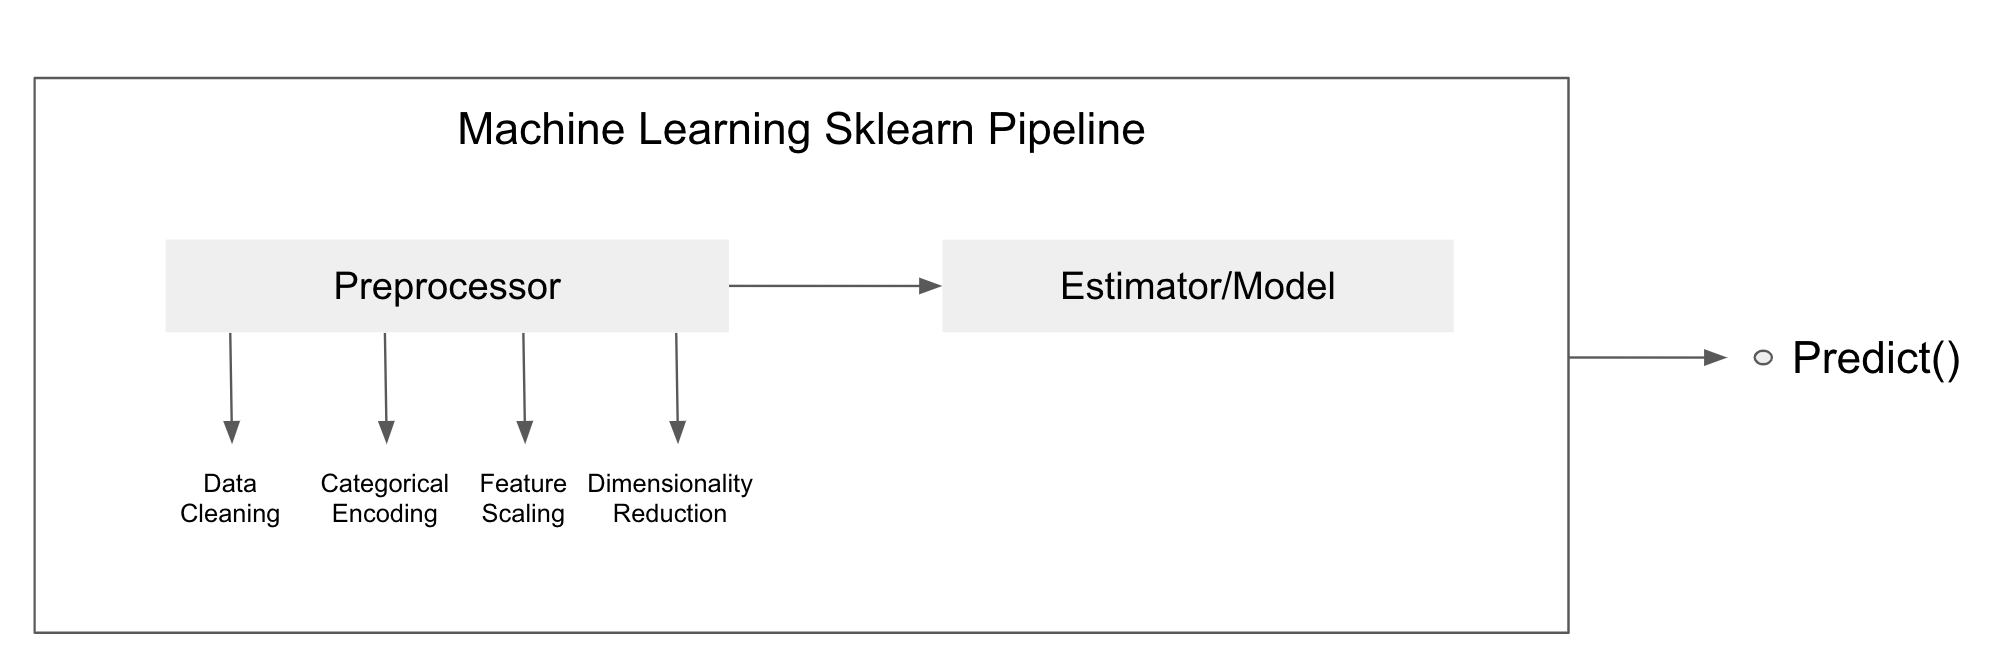

`Pipeline` in scikit-learn is a feature that allows you to chain multiple estimators into one. It sequentially applies a list of transforms and a final estimator. Pipelines are particularly useful when you need to execute a series of steps in a fixed order, such as data preprocessing, feature selection, and model fitting.

Here's a breakdown of how `Pipeline` works:

1. **Initialization**: You create a `Pipeline` object by providing it with a list of tuples, where each tuple contains a name (string) and an estimator or a transformer. The name is used as a key to access the particular step of the pipeline.

2. **Execution**: When you call the `fit()` method on the pipeline object, it sequentially applies the transformations defined in each step, fitting each estimator or transformer with the data passed to it.

3. **Chaining**: Each step in the pipeline (except the last one) must be a transformer, meaning it must have both `fit()` and `transform()` methods. The output of each step (except the last one) is passed as input to the next step.

4. **Final Estimator**: The last step of the pipeline should be an estimator, meaning it should have both `fit()` and `predict()` methods. This step is typically the model you want to train and use for prediction.

5. **Convenience and Encapsulation**: Pipelines encapsulate multiple steps into a single object, making your code more concise and easier to understand. It also provides a convenient way to prevent data leakage during cross-validation or model evaluation, as all preprocessing steps are applied within the pipeline.

[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) - [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) - [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the tips dataset
tips = sns.load_dataset('tips')

# Select features and target variable
X = tips.drop(columns='tip')
y = tips['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('model', LinearRegression())
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 0.00764653846154563
Test MSE: 5.159589804531729


### Column Transformer
The `ColumnTransformer` in scikit-learn allows you to apply different preprocessing steps to different subsets of features in a dataset. This is especially useful when dealing with datasets that contain both numerical and categorical features, which require different types of preprocessing.

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load the tips dataset
tips = sns.load_dataset('tips')

# Select features and target variable
X = tips.drop(columns='tip')
y = tips['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the pipeline with preprocessing and model
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Make predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Training MSE: 1.100679381232525
Test MSE: 0.7033566017436097


## Model Complexity

Model complexity in machine learning refers to the capacity of a model to capture underlying patterns in the data. It is influenced by various factors, such as **the number of predictors, the structure of the model, and the algorithm's learning capacity**.

Here's how model complexity impacts machine learning:

<h4> Overfitting vs. Underfitting

- **Overfitting**: This happens when a model is too complex, capturing noise in the training data as if it were a genuine pattern. It performs exceptionally well on the training data but poorly on unseen data (test data), resulting in low bias but high variance.

- **Underfitting**: This occurs when a model is too simple to capture the underlying structure of the data. It might not perform well even on the training data, resulting in high bias and low variance. Such a model is considered to have low complexity.

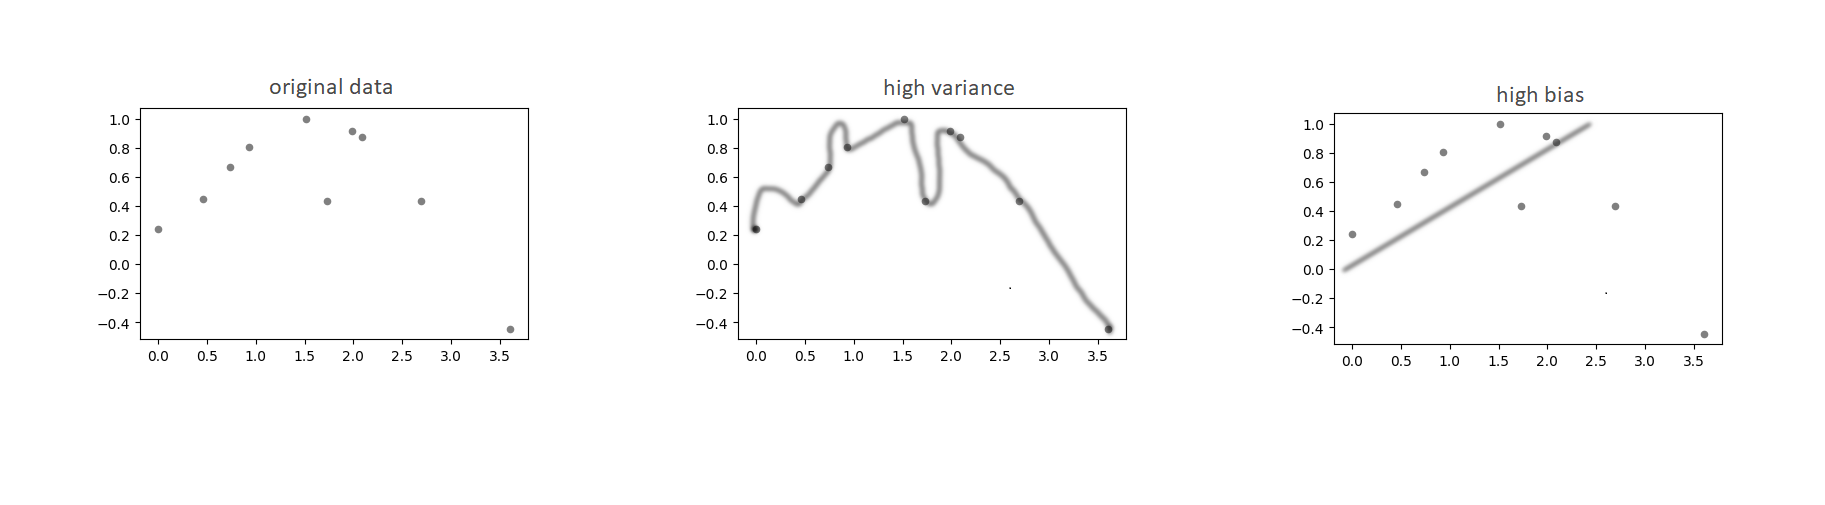

#### Bias Variance Trade-off
The bias-variance tradeoff refers to the balancing act in machine learning between the bias (error from overly simplistic models) and variance (error from overly complex models). Models with high bias tend to underfit the data, while those with high variance overfit it. Finding the right balance is crucial for creating models that generalize well to new, unseen data while accurately capturing underlying patterns in the training data.

## Feature Selection with SelectKBest

`SelectKBest` is a feature selection method provided by scikit-learn that selects features according to the k highest scores from a given scoring function. This method is typically used as part of the preprocessing phase in a machine learning pipeline to enhance model performance by reducing dimensionality and potentially improving model accuracy by retaining only the most informative features.

<h4> Working Mechanism of SelectKBest

**1. Scoring Function:**
`SelectKBest` requires a scoring function that measures the relationship or relevance of each individual feature with the target variable. The choice of scoring function depends on the nature of the target variable (categorical or continuous) and the type of problem (classification or regression):

- **Classification Problems:**
  - `chi2`: Measures the dependency between predictors and the target using the Chi-squared statistics.
  - `mutual_info_classif`: Measures reduction in uncertainty for target variable and the predictors.
  
- **Regression Problems:**
  - `f_regression`: Computes the correlation between predictors and the target, then converting this into an F-score.
  - `mutual_info_regression`: Mutual information for a continuous target, which captures nonlinear relationships.

**2. Feature Selection:**
Based on the scoring function, each feature gets a score indicating its importance in predicting the target variable. `SelectKBest` then retains the top k features with the highest scores. This number, k, is a parameter you can specify:

- **k = 'all'**: Retain all features, useful for benchmarking which scores are assigned to each feature.
- **k = 10**: Retain the top 10 features by score.

**3. Integration with a Pipeline:**
In practice, `SelectKBest` can be integrated into a preprocessing pipeline in scikit-learn, which might also include scaling or encoding steps before running a classifier or a regressor. This modular pipeline structure allows for the clean application of transformations and feature selections across datasets in training and testing phases.

In [ ]:
import pandas as pd
url = 'https://drive.google.com/file/d/1tt877UDvmXDs1mS4NaaK7b47QrDjNFBa/view?usp=sharing' #model_selection.csv
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head(2)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline

X = df.drop(columns='y')
y = df["y"]

# Create and fit selector
selector = SelectKBest(f_regression, k=4)
selector.fit_transform(X, y)

# Check selected features - this tells you which features were retained
selected_features = selector.get_support(indices=True)
print("Selected features:", list(X.columns[selected_features]))